In [59]:
import pandas as pd
import seaborn as sns

In [60]:
# load the train and test datasets, the test dataset does not have labels as this is a competition
df_train = pd.read_csv('../data/raw/train.csv')
df_test = pd.read_csv('../data/raw/test.csv')

# concatenate them into a single table
df = pd.concat([df_train, df_test], ignore_index=True)
df_clean = df.copy()

In [61]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [62]:
df_train.shape[0] + df_test.shape[0]

2919

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

# Missing values

## MSZoning - impute missing values with most common

In [64]:
df.MSZoning.value_counts(dropna=False)

RL         2265
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64

In [65]:
df_clean['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

## LotFrontage - impute missing values with median

<AxesSubplot: ylabel='LotFrontage'>

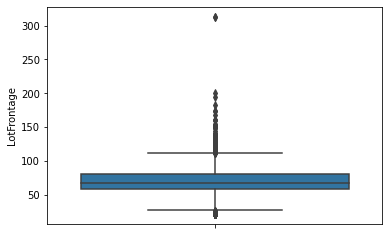

In [66]:
sns.boxplot(data=df, y='LotFrontage')

In [67]:
df_clean['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

## Alley - Change nans to 'NoAlley'

In [68]:
df.Alley.value_counts(dropna=False)

NaN     2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [69]:
df_clean['Alley'] = df['Alley'].fillna('NoAlley')

## Utilities - drop

In [70]:
df.Utilities.value_counts(dropna=False)

AllPub    2916
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64

In [71]:
df_clean = df_clean.drop('Utilities', axis=1)

## Exterior1st - impute with most common

In [72]:
df.Exterior1st.value_counts(dropna=False)

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
NaN           1
Name: Exterior1st, dtype: int64

In [73]:
df_clean["Exterior1st"] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

## Exterior2nd - impute with most common

In [74]:
df.Exterior2nd.value_counts(dropna=False)

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
NaN           1
Name: Exterior2nd, dtype: int64

In [75]:
df_clean["Exterior2nd"] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

## MasVnrType - impute with most common

In [76]:
df.MasVnrType.value_counts(dropna=False)

None       1742
BrkFace     879
Stone       249
BrkCmn       25
NaN          24
Name: MasVnrType, dtype: int64

In [77]:
df_clean["MasVnrType"] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

## MasVnrArea - most values are zero, fill nans with mode

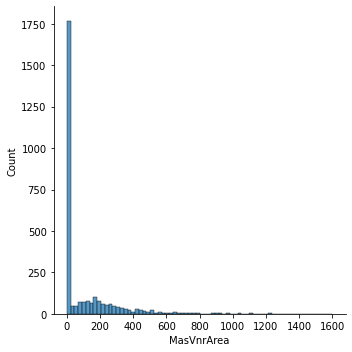

In [78]:
sns.displot(df.MasVnrArea)

In [79]:
df_clean["MasVnrArea"] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

## BsmtQual - fill missing with "none"

In [80]:
df.BsmtQual.value_counts(dropna=False)

TA     1283
Gd     1209
Ex      258
Fa       88
NaN      81
Name: BsmtQual, dtype: int64

## Analysing basement missing values

To find houses with no basements I make sure that all the basement features agree that there is no basement because for some of them 
maybe it's just that, for example, the basement condition was not recorded but that doesn't mean there is no basement.

So, below are the IDs of all the houses that do not have a basement based on this analysis

In [81]:
bsmt_list = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
df_bsmt = df[df[bsmt_list].isna().all(axis=1)]
nb_indexes = list(df_bsmt.index) # indexes of houses with no basements
len(nb_indexes)

79

For all houses where there is no basement, we will replace the missing value of a feature such as BsmtQual with the value 
'NB' (No Basement), then for the remainder of missing values we will fill them with the most common value.

In [82]:
# Fill true missing basements with NB (No Basement)
nb_dict = {idx: 'NB' for idx in nb_indexes}
df_clean["BsmtQual"] = df["BsmtQual"].fillna(nb_dict)
df_clean["BsmtCond"] = df["BsmtCond"].fillna(nb_dict)
df_clean["BsmtExposure"] = df["BsmtExposure"].fillna(nb_dict)
df_clean["BsmtFinType1"] = df["BsmtFinType1"].fillna(nb_dict)
df_clean["BsmtFinType2"] = df["BsmtFinType2"].fillna(nb_dict)

# Fill missing values with most common value
df_clean["BsmtQual"].fillna(df_clean["BsmtQual"].mode()[0], inplace=True)
df_clean["BsmtCond"].fillna(df_clean["BsmtCond"].mode()[0], inplace=True)
df_clean["BsmtExposure"].fillna(df_clean["BsmtExposure"].mode()[0], inplace=True)
df_clean["BsmtFinType1"].fillna(df_clean["BsmtFinType1"].mode()[0], inplace=True)
df_clean["BsmtFinType2"].fillna(df_clean["BsmtFinType2"].mode()[0], inplace=True)

# Fill all the missing values of the basement square feet columns with 0 (only single row) 
df_clean["BsmtFinSF1"].fillna(0, inplace=True)
df_clean["BsmtFinSF2"].fillna(0, inplace=True)
df_clean["BsmtUnfSF"].fillna(0, inplace=True)
df_clean["TotalBsmtSF"].fillna(0, inplace=True)
df_clean["BsmtFullBath"].fillna(0, inplace=True)
df_clean["BsmtHalfBath"].fillna(0, inplace=True)

In [83]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

## Electrical - fill missing with most common

In [84]:
df.Electrical.value_counts(dropna=False)

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [85]:
df_clean["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

## Functional - fill with most common

In [86]:
df.Functional.value_counts(dropna=False)

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
NaN        2
Name: Functional, dtype: int64

In [87]:
df_clean["Functional"] = df["Functional"].fillna(df["Functional"].mode()[0])

## FireplaceQu - fill missing values with 'NF' 
All of the missing values are due to there not being a fireplace 'NF' = No Fireplace

In [88]:
df.FireplaceQu.value_counts(dropna=False)

NaN    1420
Gd      744
TA      592
Fa       74
Po       46
Ex       43
Name: FireplaceQu, dtype: int64

In [89]:
df_clean["FireplaceQu"] = df["FireplaceQu"].fillna("NF")

## KitchenQual - only one missing, fill with most common

In [90]:
df.KitchenQual.value_counts(dropna=False)

TA     1492
Gd     1151
Ex      205
Fa       70
NaN       1
Name: KitchenQual, dtype: int64

In [91]:
df_clean["KitchenQual"] = df["KitchenQual"].fillna(df["KitchenQual"].mode()[0])

## Garage - we will go through a similar process as we did for the basement features

In [92]:
df.GarageType.value_counts(dropna=False)

Attchd     1723
Detchd      779
BuiltIn     186
NaN         157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [93]:
garage_categorical = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
garage_numerical = ["GarageYrBlt", "GarageCars", "GarageArea"]
df_garage = df[df[garage_categorical].isna().all(axis=1)]
ng_indexes = list(df_garage.index) # indexes of houses with no basements
len(ng_indexes)

157

In [94]:
# Fill missing garages with 'NG' (No Garage)
ng_dict = {idx: 'NG' for idx in ng_indexes}
df_clean["GarageType"] = df["GarageType"].fillna(ng_dict)
df_clean["GarageFinish"] = df["GarageFinish"].fillna(ng_dict)
df_clean["GarageQual"] = df["GarageQual"].fillna(ng_dict)
df_clean["GarageCond"] = df["GarageCond"].fillna(ng_dict)

# For the categorical data, Fill rest remaining missing values with most common
df_clean["GarageFinish"].fillna(df_clean["GarageFinish"].mode()[0], inplace=True)
df_clean["GarageQual"].fillna(df_clean["GarageQual"].mode()[0], inplace=True)
df_clean["GarageCond"].fillna(df_clean["GarageCond"].mode()[0], inplace=True)

# Garage Numerical

## GarageYrBlt

We will drop this column as there are a lot of missing values and this column is probably not a very good predictor
of Sale Price, or not better than the YrBuilt of a house. It is most likely highly correlated with the YrBuilt feature
so there is no need to keep two of them

<AxesSubplot: xlabel='YearBuilt', ylabel='GarageYrBlt'>

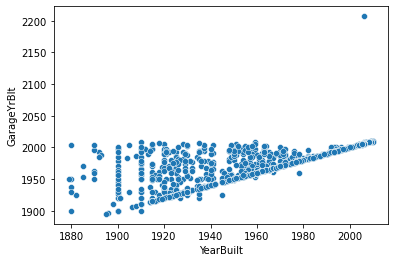

In [95]:
sns.scatterplot(data=df, x='YearBuilt', y='GarageYrBlt')

Comment: Not sure why there is one data point where the garage was built in 2200, but we will remove this column anyway

In [96]:
df_clean.drop('GarageYrBlt', axis=1, inplace=True)

## GarageCars - fill missing with most common

In [97]:
df_clean["GarageCars"] = df_clean["GarageCars"].fillna(df_clean["GarageCars"].mode()[0])

## GarageArea 
as there is only a single missing value in this column, impute it with median area of a garage with capacity for 2 cars

In [98]:
df_clean[["GarageCars","GarageArea"]].groupby("GarageCars").median()

,GarageArea
GarageCars,
0.0,0.0
1.0,288.0
2.0,506.0
3.0,807.5
4.0,892.0
5.0,1184.0


In [99]:
df_clean["GarageArea"] = df_clean["GarageArea"].fillna(506.0)

In [100]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

## PoolQC - we will turn this into another column called HasPool with columns being 0 or 1

In [101]:
df.PoolQC.value_counts(dropna=False)

NaN    2909
Ex        4
Gd        4
Fa        2
Name: PoolQC, dtype: int64

In [102]:
df_clean["HasPool"] = df.PoolQC.isna()*1.0

In [103]:
df_clean.HasPool.value_counts()

1.0    2909
0.0      10
Name: HasPool, dtype: int64

In [104]:
# Drop both PoolQC and PoolArea
df_clean.drop('PoolQC', axis=1, inplace=True)
df_clean.drop('PoolArea', axis=1, inplace=True)

## Fence - missing values mean there is no fence so fill missing with 'NF' (No Fence)

In [105]:
df.Fence.value_counts(dropna=False)

NaN      2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [106]:
df_clean["Fence"] = df["Fence"].fillna('NF')

## MiscFeature - replace column with HasMiscFeature

In [107]:
df.MiscFeature.value_counts(dropna=False)

NaN     2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [108]:
df_clean["HasMiscFeature"] = df.MiscFeature.isna()*1.0
df_clean.drop("MiscFeature", axis=1, inplace=True)

## SaleType - fill with most common

In [109]:
df.SaleType.value_counts(dropna=False)

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
NaN         1
Name: SaleType, dtype: int64

In [110]:
df_clean["SaleType"] = df["SaleType"].fillna(df["SaleType"].mode()[0])

In [111]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              2919 non-null   int64  
 1   MSSubClass      2919 non-null   int64  
 2   MSZoning        2919 non-null   object 
 3   LotFrontage     2919 non-null   float64
 4   LotArea         2919 non-null   int64  
 5   Street          2919 non-null   object 
 6   Alley           2919 non-null   object 
 7   LotShape        2919 non-null   object 
 8   LandContour     2919 non-null   object 
 9   LotConfig       2919 non-null   object 
 10  LandSlope       2919 non-null   object 
 11  Neighborhood    2919 non-null   object 
 12  Condition1      2919 non-null   object 
 13  Condition2      2919 non-null   object 
 14  BldgType        2919 non-null   object 
 15  HouseStyle      2919 non-null   object 
 16  OverallQual     2919 non-null   int64  
 17  OverallCond     2919 non-null   i

In [112]:
df_train_clean = df_clean[df_clean.SalePrice.notna()]
df_test_clean = df_clean[df_clean.SalePrice.isna()]

In [117]:
print(df_train.shape, df_train_clean.shape)
print(df_test.shape, df_test_clean.shape)

(1460, 81) (1460, 78)
(1459, 80) (1459, 78)


In [118]:
df_train_clean.to_csv('../data/interim/train.csv', index=False)

In [119]:
df_test_clean.to_csv('../data/interim/test.csv', index=False)

In [116]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1460 non-null   int64  
 1   MSSubClass      1460 non-null   int64  
 2   MSZoning        1460 non-null   object 
 3   LotFrontage     1460 non-null   float64
 4   LotArea         1460 non-null   int64  
 5   Street          1460 non-null   object 
 6   Alley           1460 non-null   object 
 7   LotShape        1460 non-null   object 
 8   LandContour     1460 non-null   object 
 9   LotConfig       1460 non-null   object 
 10  LandSlope       1460 non-null   object 
 11  Neighborhood    1460 non-null   object 
 12  Condition1      1460 non-null   object 
 13  Condition2      1460 non-null   object 
 14  BldgType        1460 non-null   object 
 15  HouseStyle      1460 non-null   object 
 16  OverallQual     1460 non-null   int64  
 17  OverallCond     1460 non-null   i